In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import collections 
from wordcloud import WordCloud

rank = pd.read_csv("/Users/seohyunahn/Desktop/Lion_AI/2nd/11.7/comment_rank.csv")
rank.head(5)

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
2,2,롱 리브 더 킹: 목포 영웅,NaN,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10


In [9]:
rank.sort_values(by=['rank'], ascending=True)

,Unnamed: 0,movie,comment,rank
922,922,서복,핵노잼 별한개도 아까운 영,6
351,351,언포기버블,영화의 단조로운 스토리를 긴장감있,6
471,471,언포기버블,영화의 단조로운 스토리를 긴장감있,6
702,702,언포기버블,영화의 단조로운 스토리를 긴장감있,6
251,251,언포기버블,영화의 단조로운 스토리를 긴장감있,6
...,...,...,...,...
415,415,아수라,찢었다...모든게 찢었다.,10
419,419,어메이징 스파이더맨,샘스파보다 발전한 볼,10
420,420,미드소마,문화 차이. 미리 말을 하던,10
404,404,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10


--------

#### 1. top 10 rank visualization

In [13]:
rank_10 = rank[rank["rank"] == 10]
rank_10

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
2,2,롱 리브 더 킹: 목포 영웅,NaN,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10
5,5,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
...,...,...,...,...
981,981,인질,재미있게 봤습니다.,10
983,983,미드소마,문화 차이. 미리 말을 하던,10
984,984,언포기버블,영화의 단조로운 스토리를 긴장감있,10
985,985,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,10


In [14]:
# 중복 데이터 확인: 강사님 코드 
print(rank_10['comment'].nunique())
print(rank_10.isnull().sum())

12
Unnamed: 0     0
movie          0
comment       99
rank           0
dtype: int64


In [15]:
# 결측 데이터 확인: 강사님 코드 
rank_10 = rank_10.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(rank_10.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [16]:
rank_10

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10
5,5,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
9,9,인질,진짜 할거없으신뷴들은 보세요. ^^ 시간이 넘 아까운...,10
...,...,...,...,...
980,980,매트릭스,최고의 영화 중 하나!! 꼭 극장에서 관람 하시길,10
981,981,인질,재미있게 봤습니다.,10
983,983,미드소마,문화 차이. 미리 말을 하던,10
984,984,언포기버블,영화의 단조로운 스토리를 긴장감있,10


In [17]:
from konlpy.tag import Okt 
okt = Okt()

temp_list = []

for sentence in rank_10['comment']: 
    s_list = okt.pos(sentence)
    for word,tag in s_list:
        if tag in ['Noun', 'Adjective']: 
            temp_list.append(word)
counts = collections.Counter(temp_list)
tag = counts.most_common(50)
tag

[('좋아하는', 273),
 ('말', 160),
 ('영화', 153),
 ('감동', 106),
 ('진짜', 106),
 ('꼭', 99),
 ('싱크홀', 91),
 ('별로', 91),
 ('많던데', 91),
 ('제', 91),
 ('장르', 91),
 ('배우', 91),
 ('분', 91),
 ('보고', 91),
 ('이제', 91),
 ('진심', 91),
 ('웃기', 91),
 ('재밌는데요', 91),
 ('쫄깃', 91),
 ('슬프고', 91),
 ('부분', 91),
 ('있고', 91),
 ('좋아요', 91),
 ('광수', 91),
 ('그냥', 91),
 ('런닝맨', 91),
 ('거', 91),
 ('같음', 91),
 ('또', 91),
 ('이학주', 91),
 ('남다름', 91),
 ('김성균', 91),
 ('좋게', 91),
 ('저', 91),
 ('모든', 91),
 ('납치', 84),
 ('범', 84),
 ('대가리', 84),
 ('지네', 84),
 ('집중', 84),
 ('안되네', 84),
 ('문화', 69),
 ('차이', 69),
 ('미리', 69),
 ('아까운', 54),
 ('핵', 39),
 ('노잼', 39),
 ('도', 39),
 ('영', 39),
 ('단조로운', 38)]

In [18]:
from wordcloud import WordCloud
#wc=WordCloud(font_path=font_path,background_color='skyblue', max_font_size=60)
wc=WordCloud(font_path='AppleGothic',background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))
cloud

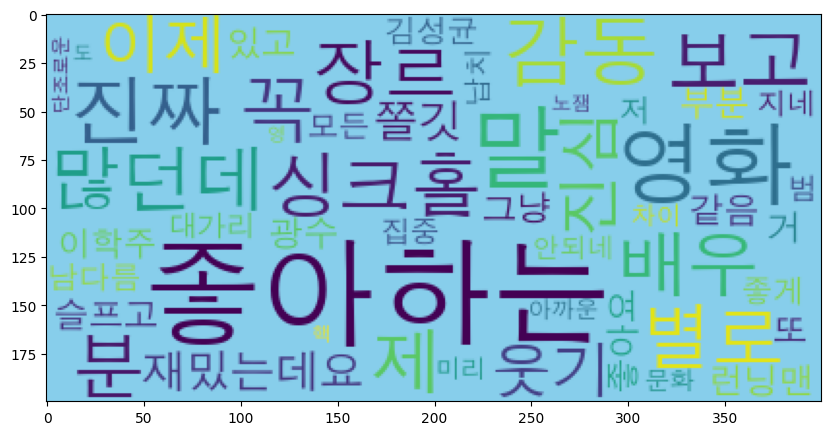

In [19]:
import matplotlib.pyplot as plt #자연어에 자주쓰는 시각화 
plt.figure(figsize=(10,8))
plt.imshow(cloud)

-------

#### 특정 영화 추출하기 